# How to use detrend classes

In [1]:
import sys

import pandas as pd
import seaborn as sns

sys.path.append("../src/functions/")
# isort: off
from detrend import (  # noqa: E402
    BSplines,
    ExponentialMA,
    LinearMA,
    LinearReg,
    PolynomialRegression,
)

ModuleNotFoundError: No module named 'detrend'

In [2]:
sns.set_theme()
# Lecture des données
data_folder = "../data/raw_data/"
stock_name = "AAPL"
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)
y = df["Close"]

In [3]:
models = [
    LinearReg(),
    PolynomialRegression(order=5, n_segments=15),
    LinearMA(window=500),
    ExponentialMA(alpha=0.9),
    BSplines(smoothing_factor=50, degree=3),
]

c:\Users\jules\Desktop\Cours\DataScience\stock-analysis\docs\../src/functions\detrend_fancy_plot.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(xticklabels)
c:\Users\jules\Desktop\Cours\DataScience\stock-analysis\docs\../src/functions\detrend_fancy_plot.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(xticklabels)
c:\Users\jules\Desktop\Cours\DataScience\stock-analysis\docs\../src/functions\detrend_fancy_plot.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(xticklabels)
c:\Users\jules\Desktop\Cours\DataScience\stock-analysis\docs\../src/functions\detrend_fancy_plot.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

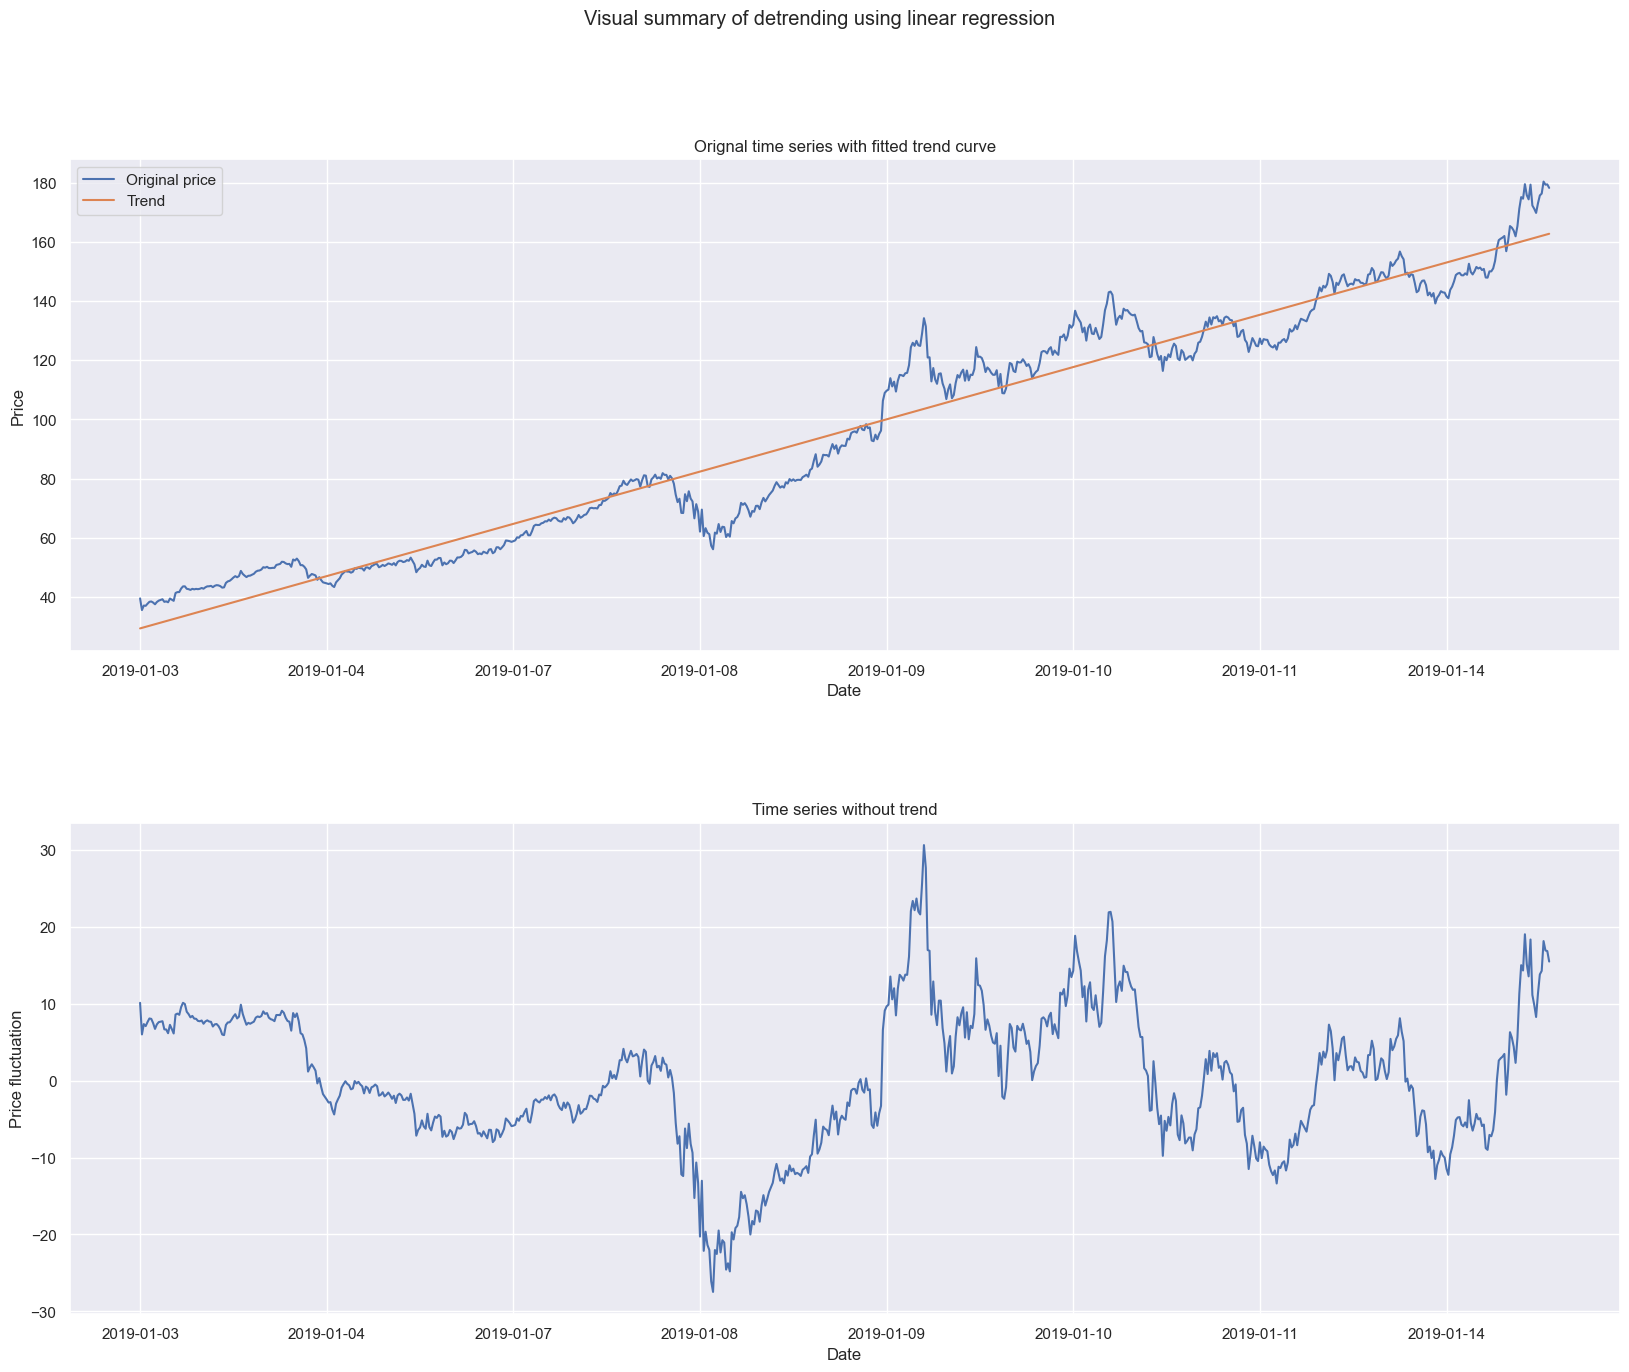

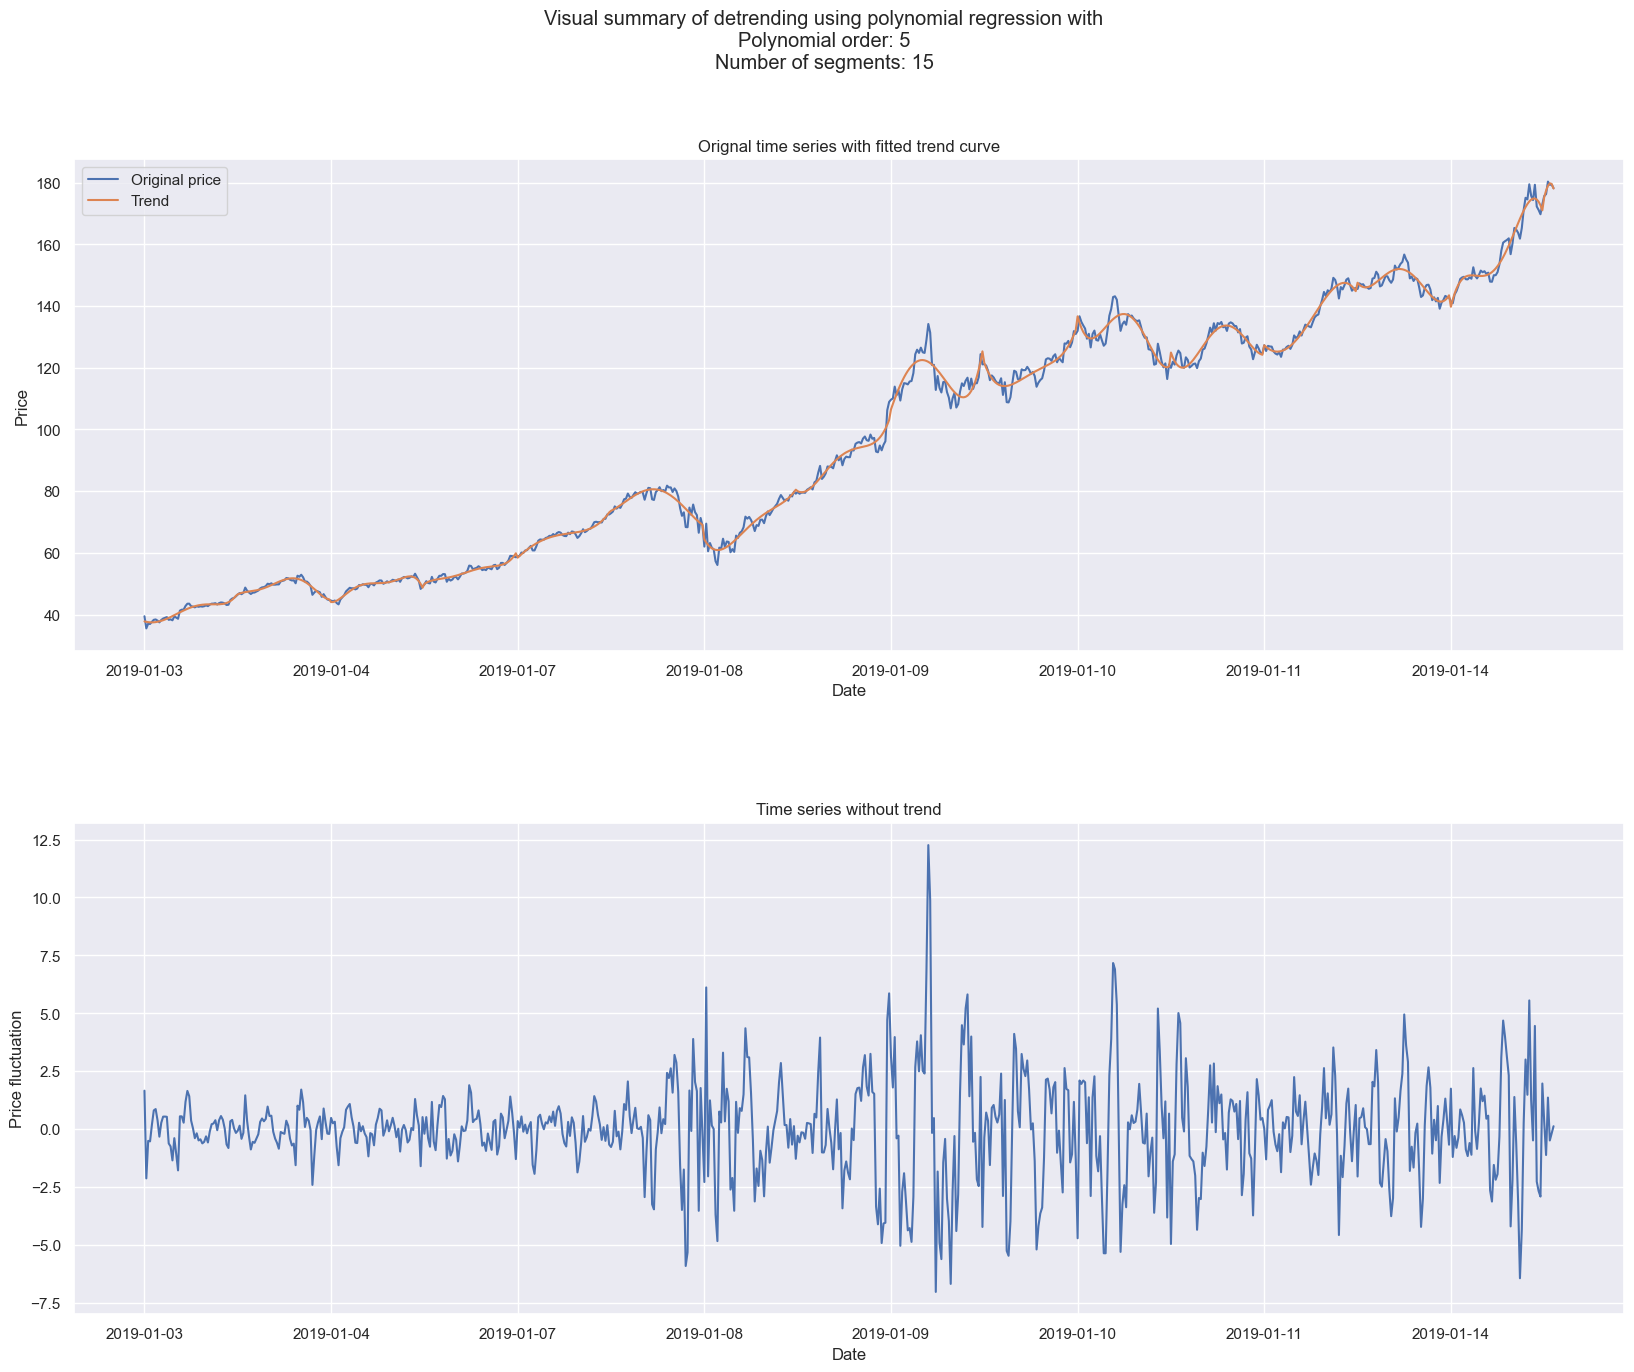

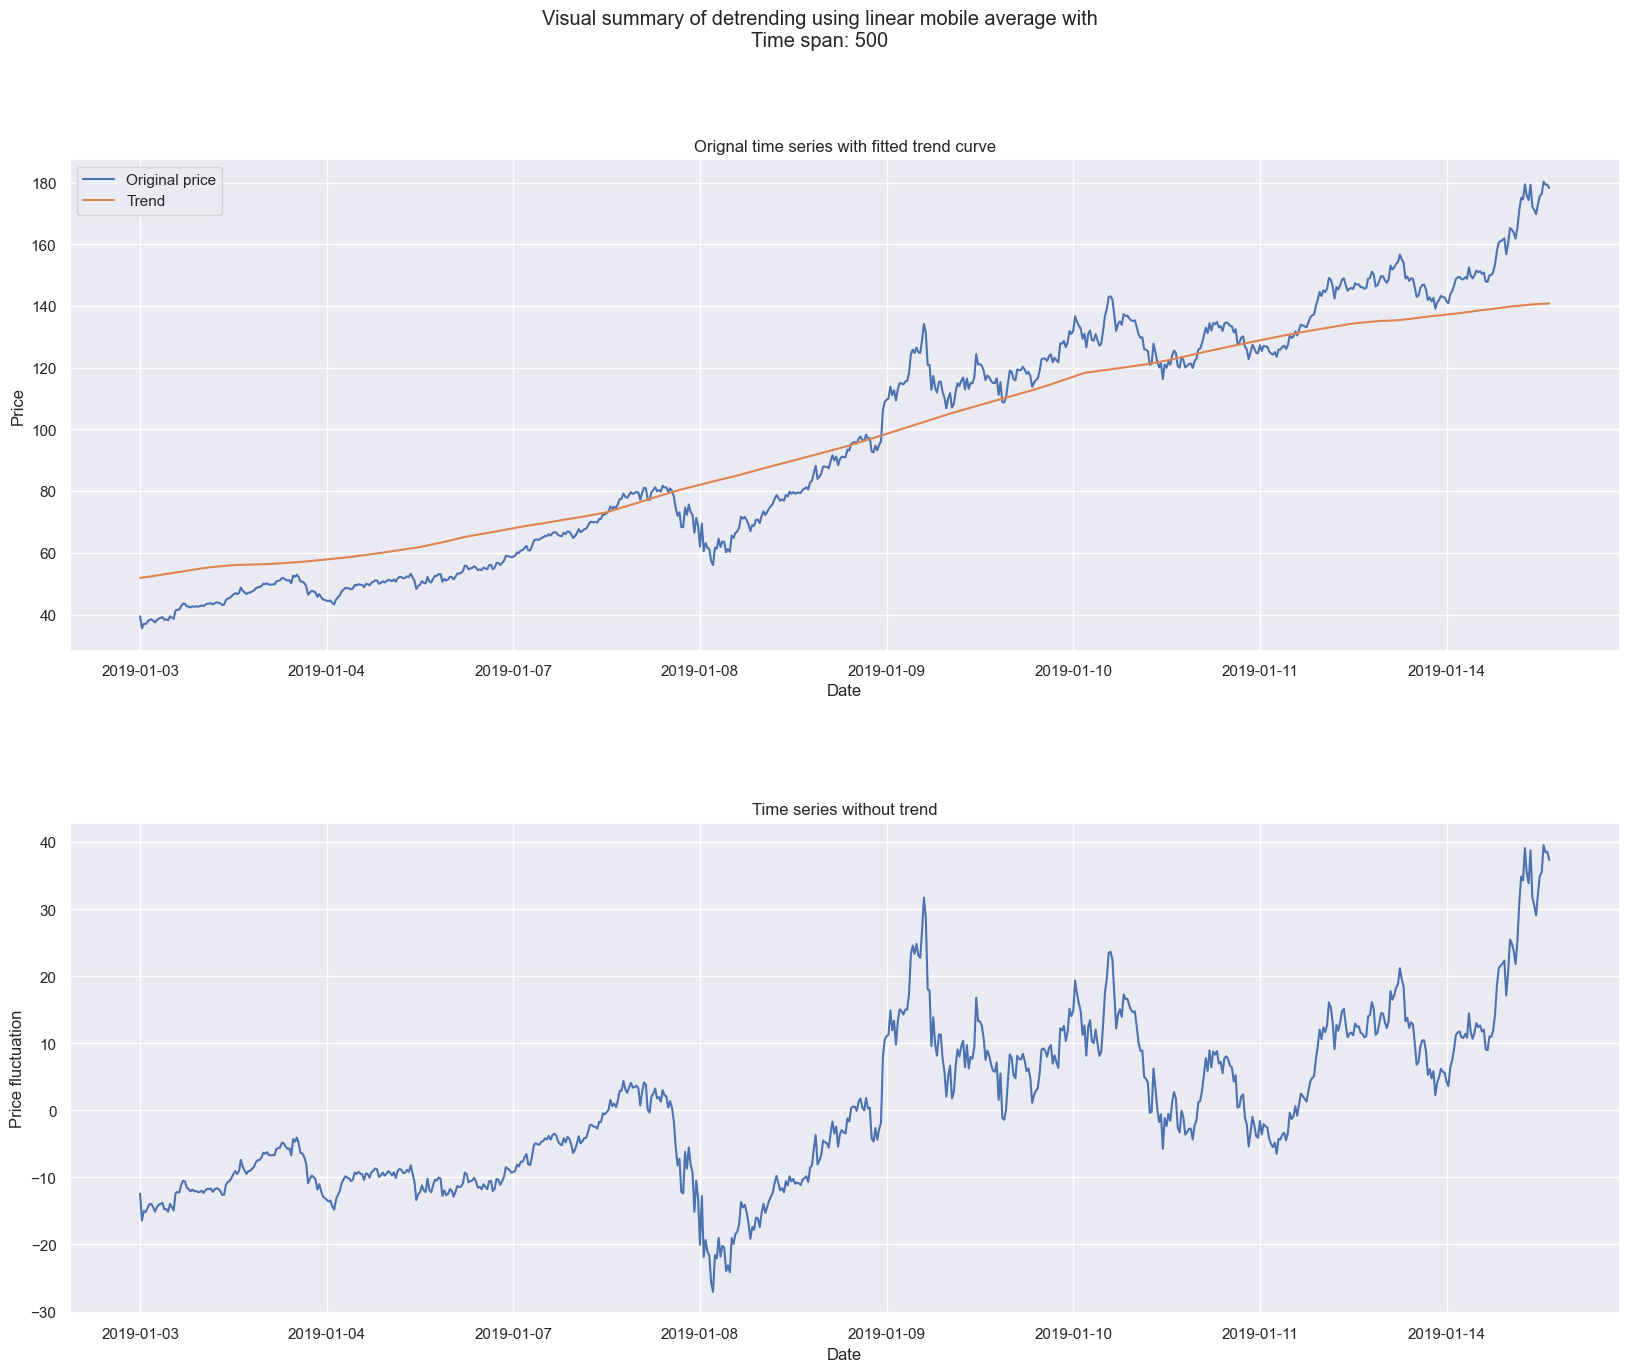

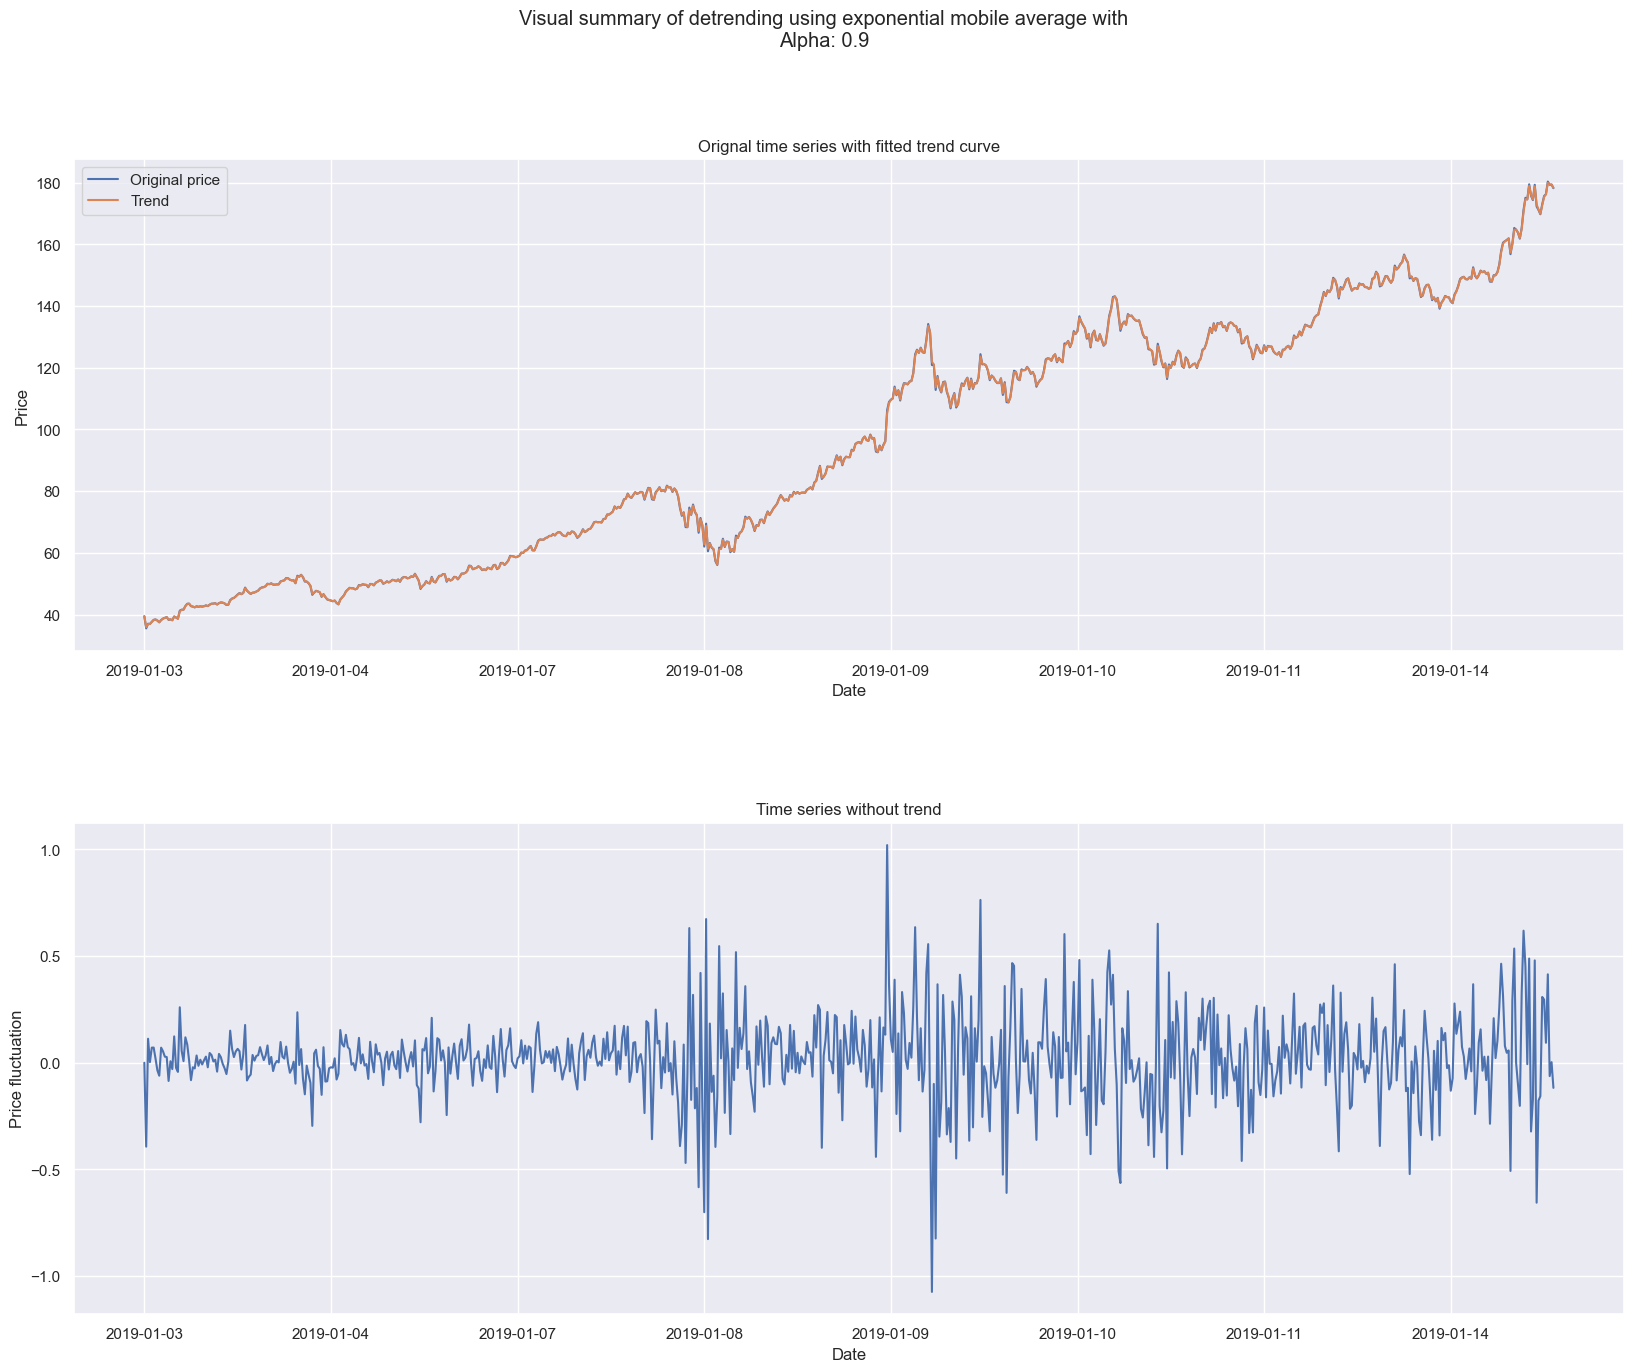

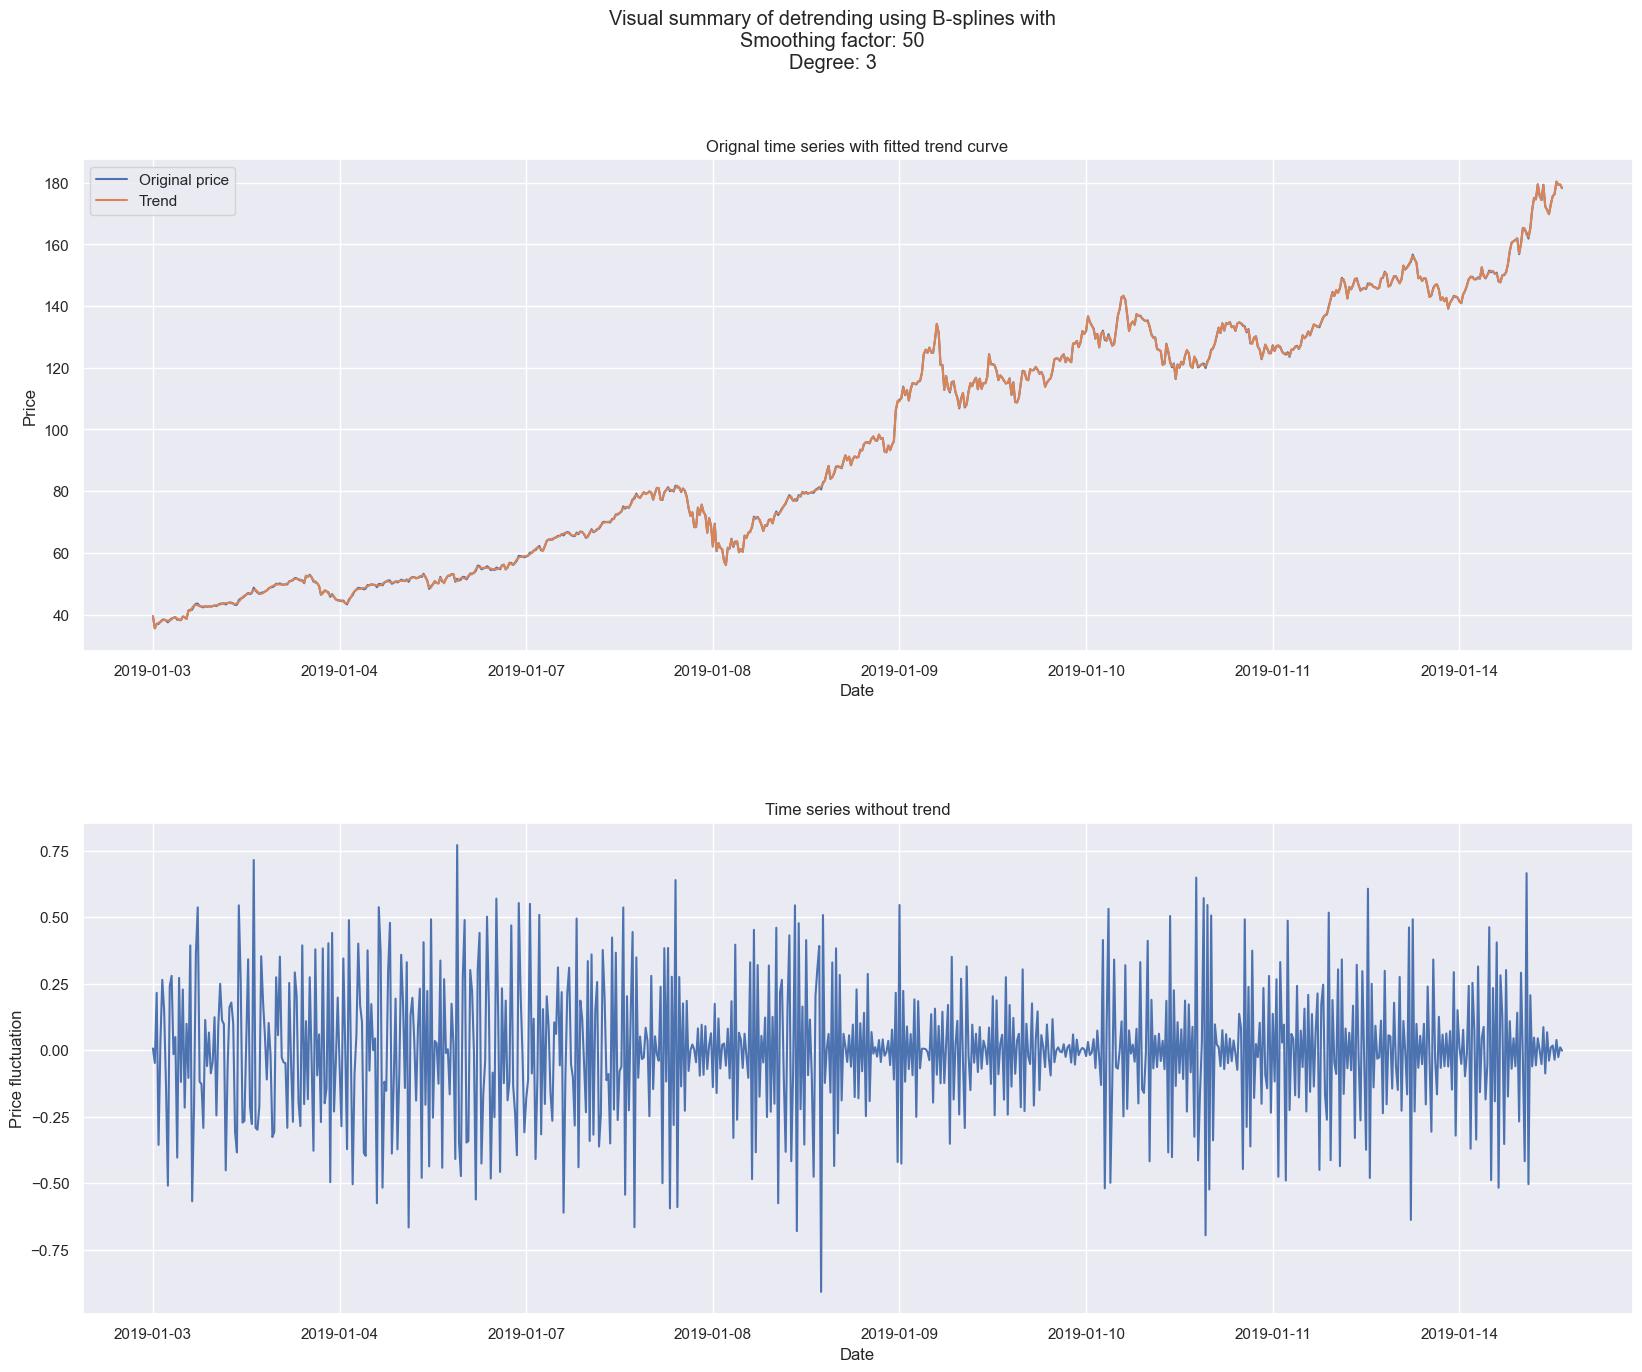

In [4]:
for detrend_model in models:
    y_fitted = detrend_model.fit(y)
    y_detrend = detrend_model.predict(y)
    detrend_model.fancy_plot(xticklabels=df.index.strftime("%Y-%m-%d"))